# Assignemnt1
## Mehrzad Mortazavi
### Part3

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 

from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
dataset =  (np.genfromtxt('communities.data', delimiter=',',dtype=float))
print dataset.shape

(1994, 128)


In [30]:
X = dataset[:,5:-1]
Y = dataset[:,-1:]
print X.shape
print Y.shape

(1994, 122)
(1994, 1)


## Computing mean and replacing missing values

In [31]:
#compute mean with discarding nans
myMean =  np.nanmean(X, axis=0)
#find where is nan
index= np.isnan(X)
#discarding third column in the caculations
index[:,3] = False
for i in range(X.shape[1]):
    X[index[:,i],i] = myMean[i]
    
myMean2 =  np.mean(X, axis=0)
index= np.isnan(X)

## Making datasets for Cross Validation and writing data to files

In [32]:
index= np.random.randint(5, size=X.shape[0])
folds = 5 
MSEtrain      = np.zeros((folds,), dtype=float)
MSEvalidation = np.zeros((folds,), dtype=float)
Warray = np.zeros((5,122),dtype=float)
for i in range(folds):
    TS = X[index !=i]
    VS = X[index == i]
    TSy = Y[index !=i]
    VSy = Y[index == i]
    W1 = inv(np.dot(TS.T,TS))
    W2 = np.dot(TS.T,TSy)
    W = np.dot(W1,W2)
    nameTrain = "CandC-train%d.csv"%(i+1);
    nameValid = "CandC-test%d.csv"%(i+1)
    np.savetxt(nameTrain, np.concatenate((TS, TSy), axis=1), delimiter=',')
    np.savetxt(nameValid, np.concatenate((VS, VSy), axis=1), delimiter=',')
    Yestimated  = np.dot(TS,W )
    YestimatedV = np.dot(VS,W )
    MSEtrain[i]      = np.dot((TSy-Yestimated).T, (TSy-Yestimated))/TSy.shape[0]
    MSEvalidation[i] = np.dot((VSy-YestimatedV).T, (VSy-YestimatedV))/VSy.shape[0]
    Warray[i] = W.reshape(122)

print MSEtrain
print MSEvalidation


[ 0.01580374  0.01616757  0.0163014   0.01613539  0.01556101]
[ 0.02011818  0.01892912  0.90061031  0.01923793  0.02132361]


In [33]:
print "min of MSEtrain is:"
print MSEtrain[np.argmin(MSEtrain)]
print
print "min of MSEvalidation is:"
print MSEvalidation[np.argmin(MSEvalidation)]

min of MSEtrain is:
0.0155610087627

min of MSEvalidation is:
0.0189291242613


In [34]:
print "Average MSE of train is %f"%(np.sum(MSEtrain)/MSEtrain.shape[0])
print "Average MSE of validatoin is %f"%(np.sum(MSEvalidation)/MSEvalidation.shape[0])

Average MSE of train is 0.015994
Average MSE of validatoin is 0.196044


## Learned parameters (W)

In [35]:
for i in range(5):
    print Warray[i]
    print 

[  3.73624625e-01  -4.56620706e-02   1.48587529e-01  -9.41123174e-02
  -1.66171000e-02   3.54766815e-02   8.55990135e-02  -3.36800117e-01
  -1.51781499e-02   1.83245456e-02  -5.02161060e-01   5.08293711e-02
  -1.74634067e-01  -8.02178829e-02   3.16034771e-02  -1.79235596e-01
   1.79298670e-01   3.40838026e-02  -8.74761548e-02   3.58194064e-01
  -6.71762601e-02  -2.79336180e-01  -4.15059612e-02  -3.75572589e-02
   2.91057122e-02   4.58531136e-02   4.12136822e-02   1.00497293e-01
  -2.08924099e-01  -9.61432223e-02   5.30037249e-03   6.81905815e-02
  -1.96729546e-03   2.39155738e-01  -8.57227782e-02  -3.71872666e-02
   1.04315207e-01   1.18474806e-01   1.69469053e-01   2.10731910e-01
  -1.92535316e-01   5.88154218e-02  -8.46405394e-02  -1.40622666e-01
  -1.70025390e-01  -1.66293215e-02  -4.69292909e-03   7.94912360e-02
  -2.07359518e-01  -1.59966819e-01   1.22720197e-01  -1.85625496e-01
   4.34954698e-03   5.25547577e-02  -1.04881460e-01   5.42409534e-02
   5.27332766e-02  -2.51895173e-01

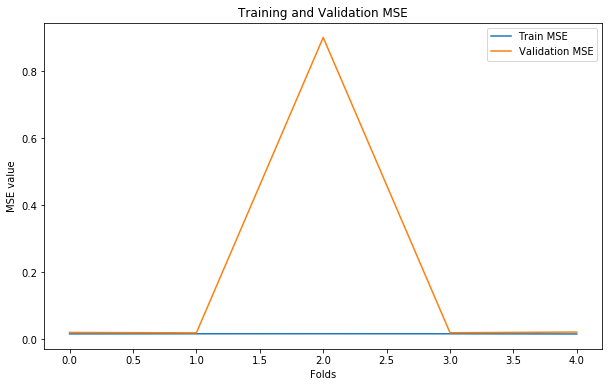

In [36]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Training and Validation MSE')
plt.plot(range(5),MSEtrain,      label="Train MSE"     )
plt.plot(range(5),MSEvalidation, label="Validation MSE")
ax.set_xlabel('Folds')
ax.set_ylabel('MSE value')
ax.legend(loc='best')



plt.show()

## Ridge

In [37]:
print TS.shape
print X.shape

(1600, 122)
(1994, 122)


In [38]:
steps = 10
folds = 5 
index= np.random.randint(folds, size=X.shape[0])

Wridge = np.zeros((steps,X.shape[1]), dtype=float)


MSEtrainRidge      = np.zeros((steps,folds), dtype=float)
MSEvalidationRidge = np.zeros((steps,folds), dtype=float)
Lamda = np.arange(0,1,1.0/steps) #5 steps

for i in range(steps):
    for j in range(folds):
        TS = X[index !=j]
        VS = X[index == j]
        TSy = Y[index !=j]
        VSy = Y[index == j]
        W1 = inv(np.dot(TS.T,TS)) +np.dot(Lamda[i],np.identity(122))
        W2 = np.dot(TS.T,TSy)
        Wridge[j,:]  = np.dot(W1,W2).ravel()
        YRidge  = np.dot(TS,Wridge[j])
        YRidgeV = np.dot(VS,Wridge[j])
        YRidge = YRidge.reshape(YRidge.shape[0],1)
        YRidgeV = YRidgeV.reshape(YRidgeV.shape[0],1)
        MSEtrainRidge[i,j]      = np.dot((TSy-YRidge).T, (TSy-YRidge))/TSy.shape[0]
        MSEvalidationRidge[i,j] = np.dot((VSy-YRidgeV).T, (VSy-YRidgeV))/VSy.shape[0]
    

print MSEtrainRidge
print MSEvalidationRidge

[[  1.60107444e-02   1.65071147e-02   1.55583011e-02   1.56921151e-02
    1.62269005e-02]
 [  5.39627502e+05   5.41383152e+05   5.47130026e+05   5.73043608e+05
    5.54652237e+05]
 [  2.15850996e+06   2.16553256e+06   2.18852006e+06   2.29217438e+06
    2.21860890e+06]
 [  4.85664739e+06   4.87244824e+06   4.92417011e+06   5.15739235e+06
    4.99187001e+06]
 [  8.63403979e+06   8.66213019e+06   8.75408018e+06   9.16869749e+06
    8.87443556e+06]
 [  1.34906872e+07   1.35345784e+07   1.36782503e+07   1.43260898e+07
    1.38663055e+07]
 [  1.94265895e+07   1.94897929e+07   1.96966804e+07   2.06295693e+07
    1.99674800e+07]
 [  2.64417468e+07   2.65277737e+07   2.68093705e+07   2.80791360e+07
    2.71779589e+07]
 [  3.45361591e+07   3.46485207e+07   3.50163207e+07   3.66747899e+07
    3.54977422e+07]
 [  4.37098264e+07   4.38520340e+07   4.43175309e+07   4.64165310e+07
    4.49268299e+07]]
[[  1.88136050e-02   1.08772946e+00   2.16661965e-02   2.05148164e-02
    1.93250960e-02]
 [  5.456

In [39]:
print "Average MSE of train is "
print (np.sum(MSEtrainRidge, axis=1)/MSEtrainRidge.shape[0])
print "Average MSE of validatoin is "
print (np.sum(MSEvalidationRidge, axis=1)/MSEvalidationRidge.shape[0])

Average MSE of train is 
[  7.99951758e-03   2.75583653e+05   1.10233459e+06   2.48025281e+06
   4.40933832e+06   6.88959112e+06   9.92101121e+06   1.35035986e+07
   1.76373533e+07   2.23222752e+07]
Average MSE of validatoin is 
[  1.16804918e-01   2.75420353e+05   1.10169615e+06   2.47882750e+06
   4.40681441e+06   6.88565688e+06   9.91535491e+06   1.34959085e+07
   1.76273176e+07   2.23095823e+07]


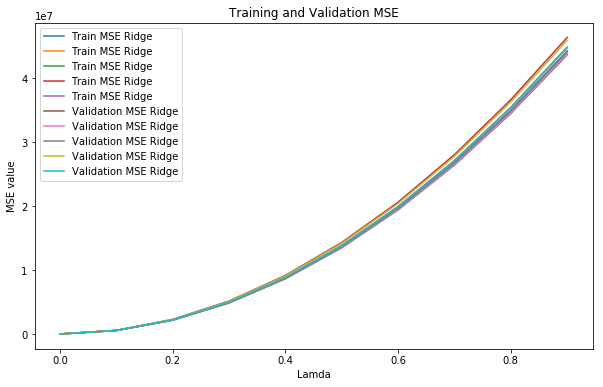

In [40]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Training and Validation MSE')
plt.plot(Lamda,MSEtrainRidge,      label="Train MSE Ridge"     )
plt.plot(Lamda,MSEvalidationRidge, label="Validation MSE Ridge")
ax.set_xlabel('Lamda')
ax.set_ylabel('MSE value')
ax.legend(loc='best')
plt.show()

In [44]:
print Wridge[np.argmin(MSEvalidationRidge)]
print
print Wridge[np.argmax(MSEvalidationRidge)]

[  37.19722539  153.70735392  113.71103244  200.57290312   56.00472671
   69.61812254  145.83050746  174.14107063  118.91008626  147.71153607
   38.7533932   250.51987153   93.62789109  170.74404408   88.78610675
  134.64294286  166.30531131  147.0954257   157.65967934   99.53920453
   97.53245465  112.44791236   83.53174908   63.83858472   98.46987201
   88.42611067  115.95304946   39.73756037  139.46708285  132.91440553
  160.05877649  102.2117439   154.35681466  151.95934454  130.02040124
  144.69881306  150.11307136  129.73944059  188.75047932  165.12169625
  197.66766955  200.37843781  170.51887711  160.06132217  160.13602363
  176.70233998  155.12856439  169.38045127  170.67583589   31.26540026
  140.80162364   19.74446458  122.65100528  138.66057021  153.16125975
  165.1833159    80.41222401   81.71408647   83.87100772   83.0947148
  249.45763502   71.45499086  113.53196039  101.55633854  153.19711657
  159.72218492  150.29193949  155.03778989   93.28724068  195.61067927
   74.1

IndexError: index 48 is out of bounds for axis 0 with size 10